# Data Project - Stock Market Analysis
Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!  

We'll be answering the following questions along the way:  

1.) What was the change in price of the stock over time?  
2.) What was the daily return of the stock on average?  
3.) What was the moving average of the various stocks?  
4.) What was the correlation between different stocks' closing prices?  
4.) What was the correlation between different stocks' daily returns?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior?  

**Basic Analysis of Stock Information**  
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [21]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
%matplotlib inline

In [7]:
#to read data online
from pandas_datareader.data import DataReader

In [9]:
from datetime import datetime

In [10]:
#Apple, Google, Microsoft, Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [19]:
#from 1 year ago to today
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [15]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [17]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,255.119167,249.380596,251.875039,252.493667,3.347801e+07,251.014953
std,43.708837,42.496043,42.953630,43.338184,1.723141e+07,43.793287
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,212.117500,207.317505,209.977501,209.145000,2.183295e+07,207.319828
50%,258.220001,249.270004,251.824997,255.315002,2.834300e+07,253.942772
75%,291.287506,284.092514,285.372490,289.040001,3.841992e+07,288.259697
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [33]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.005280
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.256134
...,...,...,...,...,...,...
2020-05-19,318.519989,313.010010,315.029999,313.140015,25432400.0,313.140015
2020-05-20,319.519989,316.519989,316.679993,319.230011,27876200.0,319.230011
2020-05-21,320.890015,315.869995,318.660004,316.850006,25672200.0,316.850006


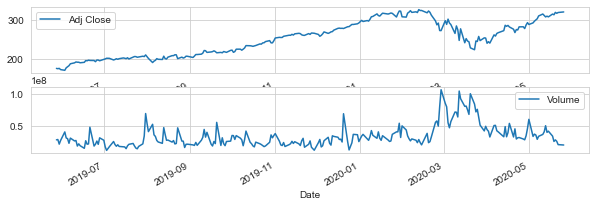

In [45]:
fig , (ax1,ax2) = plt.subplots(2,1)

AAPL['Adj Close'].plot(ax=ax1,figsize=(10,3),legend=True)
AAPL['Volume'].plot(ax=ax2,figsize=(10,3),legend=True)

Let's look into that dip between 2020-03 to 2020-05 caused by COVID-19

In [39]:
AAPL.loc['2020-03-01':'2020-05-01'].idxmin()

High        2020-03-23
Low         2020-03-23
Open        2020-03-23
Close       2020-03-23
Volume      2020-04-28
Adj Close   2020-03-23
dtype: datetime64[ns]

In [40]:
AAPL.loc['2020-03-23']

High         2.285000e+02
Low          2.126100e+02
Open         2.280800e+02
Close        2.243700e+02
Volume       8.418820e+07
Adj Close    2.237643e+02
Name: 2020-03-23 00:00:00, dtype: float64

The lowest AAPL adjusted close is on 2020-03-23.
On that day, a lot of transactions were made (over 84,000,000 transactions)

# Moving Averages

In [54]:
#range of moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006,NaN,NaN,NaN
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025,NaN,NaN,NaN
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189,NaN,NaN,NaN
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.005280,NaN,NaN,NaN
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.256134,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-19,318.519989,313.010010,315.029999,313.140015,25432400.0,313.140015,309.228839,297.087250,273.965167
2020-05-20,319.519989,316.519989,316.679993,319.230011,27876200.0,319.230011,311.170001,299.281020,274.658373
2020-05-21,320.890015,315.869995,318.660004,316.850006,25672200.0,316.850006,312.563004,301.409145,275.501645


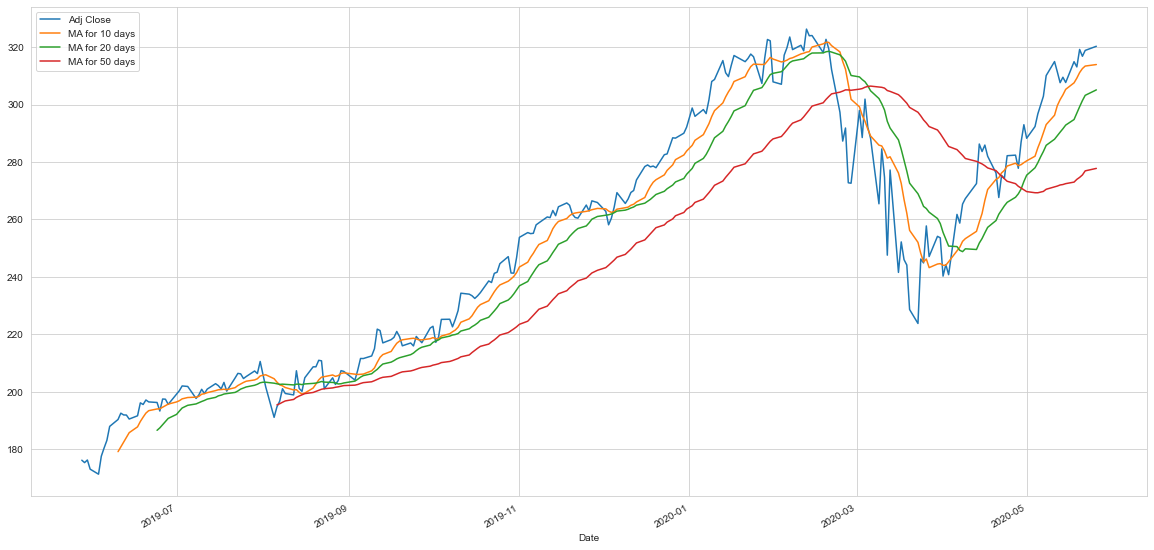

In [52]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10))

Overall, recently the adjusted close is higher than all the moving averages, especially the moving average for 50 days. It looks like everything is recovering with the uptrend.  
The shorter moving averages crossed above the 50 days one during late April suggested an uptrend and a good buying period  
Investing in AAPL still looks like a great investment despite of COVID-19 as the stock adj close has an uptrend overall

# Daily Return and Risk of Stock

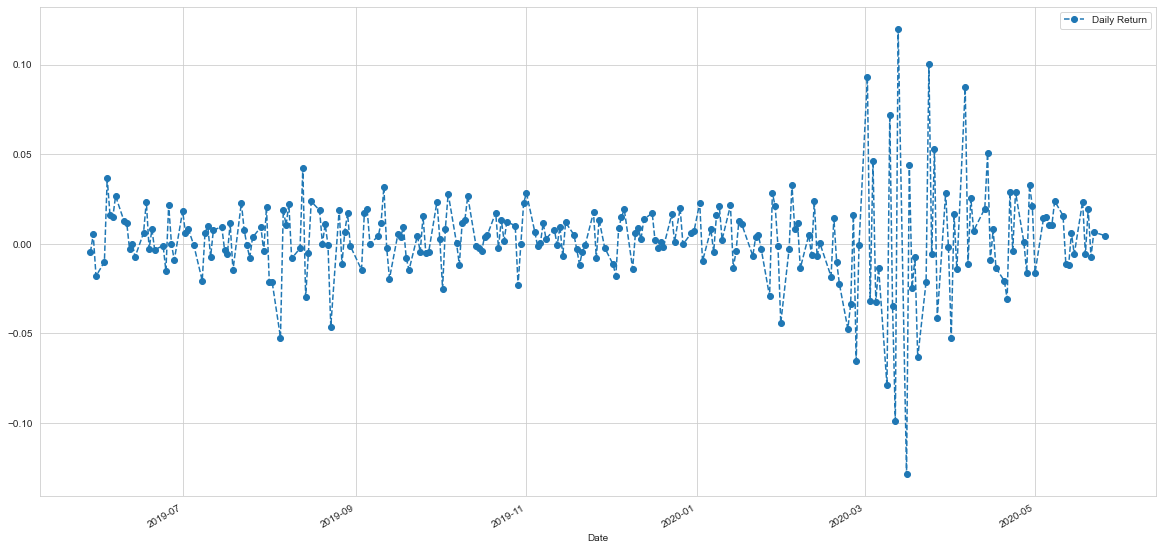

In [55]:
#Let's make a daily return column = percent change of adjc close
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(20,10),legend = True, linestyle='--',
                          marker='o')

In [56]:
AAPL['Daily Return'].idxmin()

Timestamp('2020-03-16 00:00:00')

People lost a most when buying on 2020-03-16 (almost 15%) but the daily return varied greatly during the period due to COVID-19. However, it looks like it has calmed down

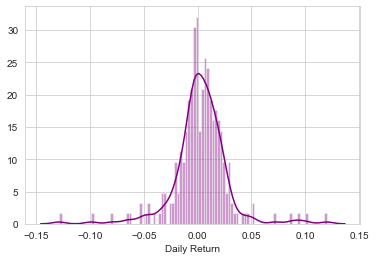

In [57]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color = 'purple')

In [59]:
#let's look at Adj Close for all of our company in tech_list

closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [61]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-28,176.128006,1134.150024,124.626442,1836.430054
2019-05-29,175.288025,1116.459961,123.421265,1819.189941
2019-05-30,176.197189,1117.949951,124.201653,1816.319946
2019-05-31,173.005280,1103.630005,122.176575,1775.069946
2019-06-03,171.256134,1036.229980,118.383247,1692.689941


In [64]:
tech_ret = closing_df.pct_change().dropna()
tech_ret

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711
2019-06-03,-0.010110,-0.061071,-0.031048,-0.046409
2019-06-04,0.036584,0.016232,0.027704,0.021782
...,...,...,...,...
2020-05-19,-0.005778,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
2020-05-21,-0.007455,-0.002787,-0.012011,-0.020497


# Comparing tech stocks

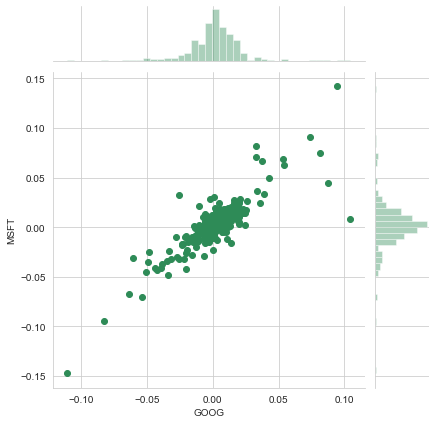

In [75]:

sns.jointplot('GOOG','MSFT',tech_ret,kind='scatter',color='seagreen')

In [74]:
stats.pearsonr(tech_ret.GOOG,tech_ret.MSFT)

(0.8516819774874164, 7.909240959094332e-72)

GOOGLE and MICROSOFT
Looks like a positive linear correlation which is around 0.85.
In the past, the correlation was not this strong. For a year ago until now, they seem to go hand in hand